# Heart Disease Prediction using Machine Learning

### Workflow of model

  - Data collection
  - Data Visualization
  - Splitting the Features and Target
  - Train-Test split
  - Model Training
  - Model Evaluation
  - Predicting Results
  - Saving Model


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score


from scipy import stats
import shap
import lime


# for model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Collection and Processing

In [3]:
# loading data into pandas data frame

heart_data = pd.read_csv("dataset/heart.csv")
heart_data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
# columns name

heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# shape of dataset

heart_data.shape

(1025, 14)

In [6]:
# describing data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# dataset information

heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# checking for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# checking the distribution of target variable

heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Data Visualization

<Axes: >

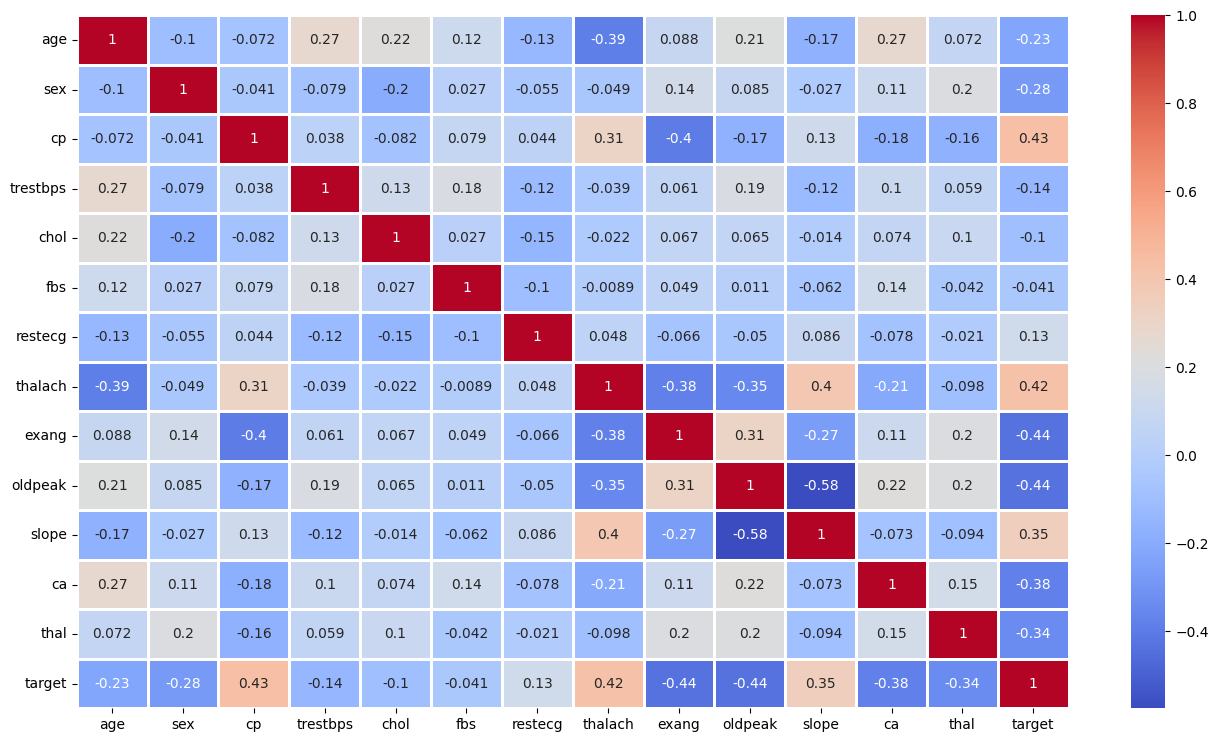

In [10]:
plt.figure(figsize= (16,9))
sns.heatmap(heart_data.corr(), annot = True, cmap='coolwarm', linewidths = 2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21436\866607215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_data["target"], palette='muted')


<Axes: xlabel='target', ylabel='count'>

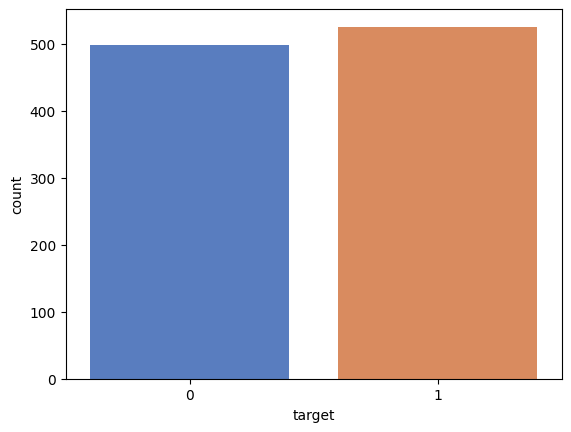

In [11]:
sns.countplot(x=heart_data["target"], palette='muted')

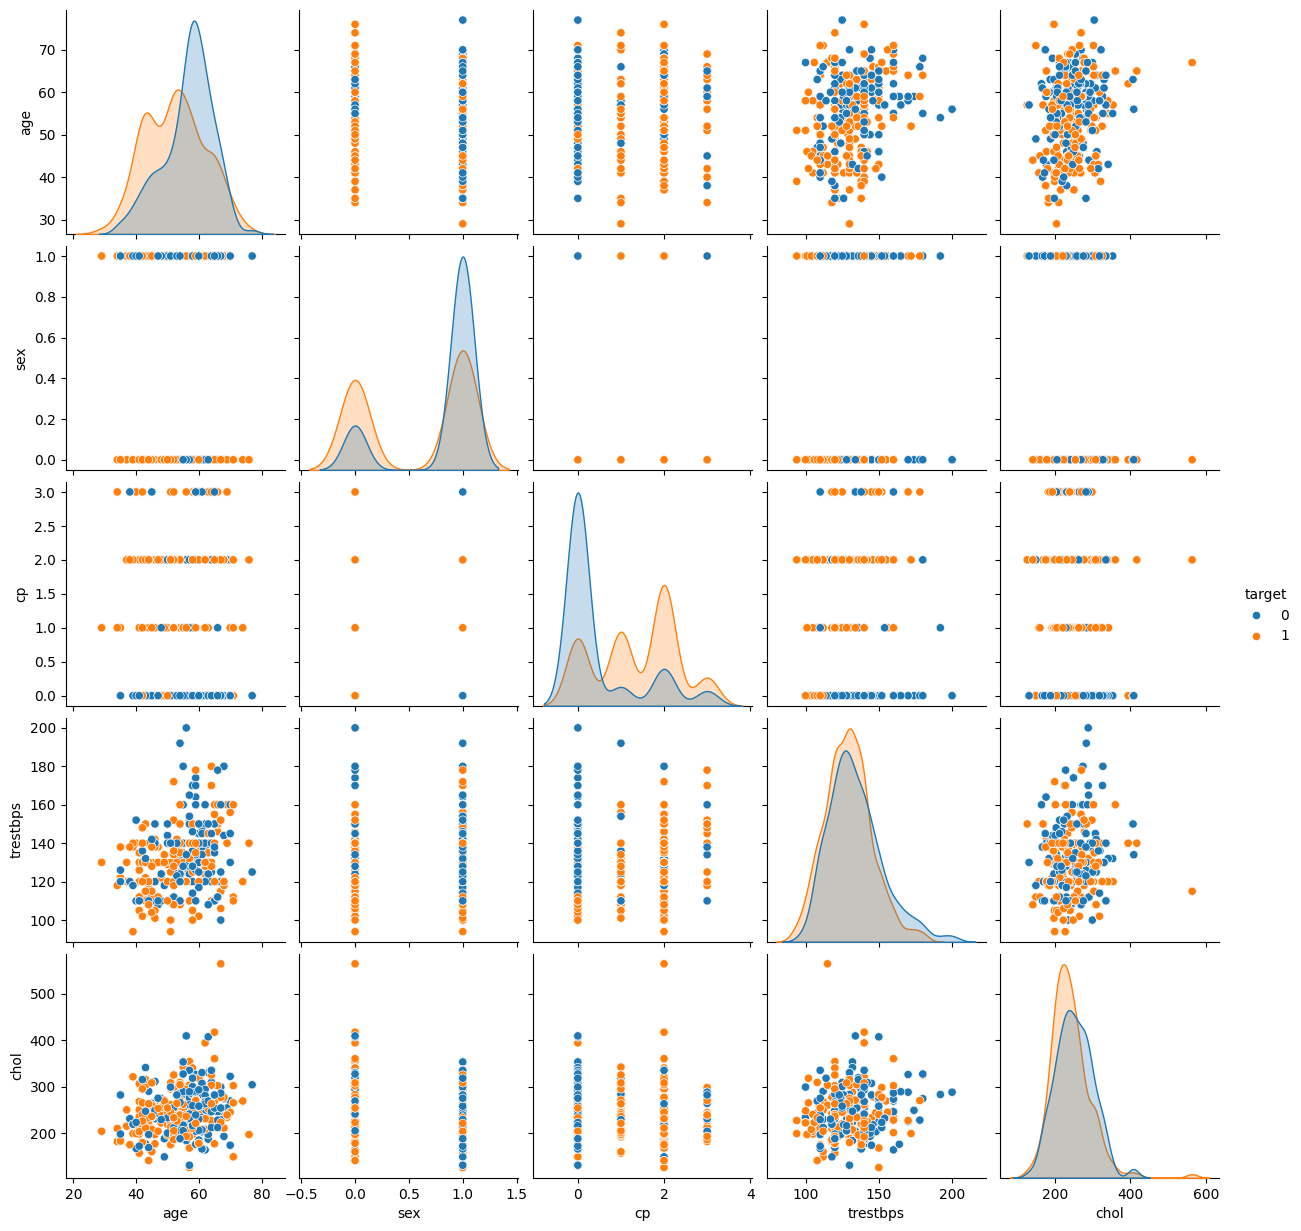

In [12]:
sns.pairplot(heart_data, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol' ])

# pair plot in dataset of outcome with all columns

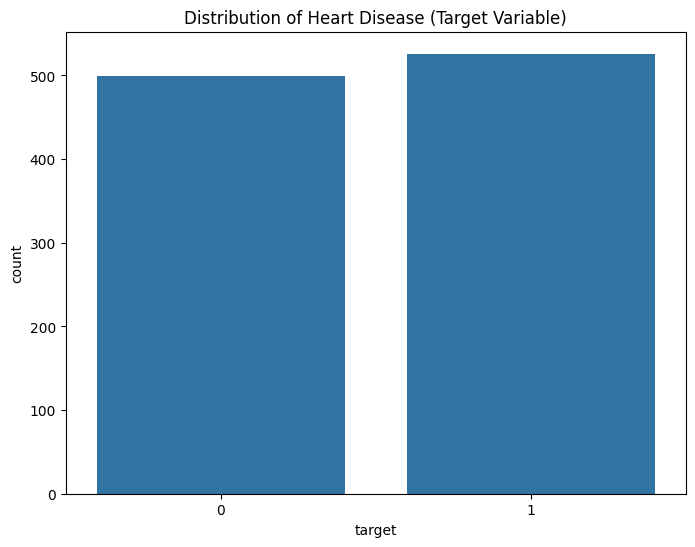

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.show()

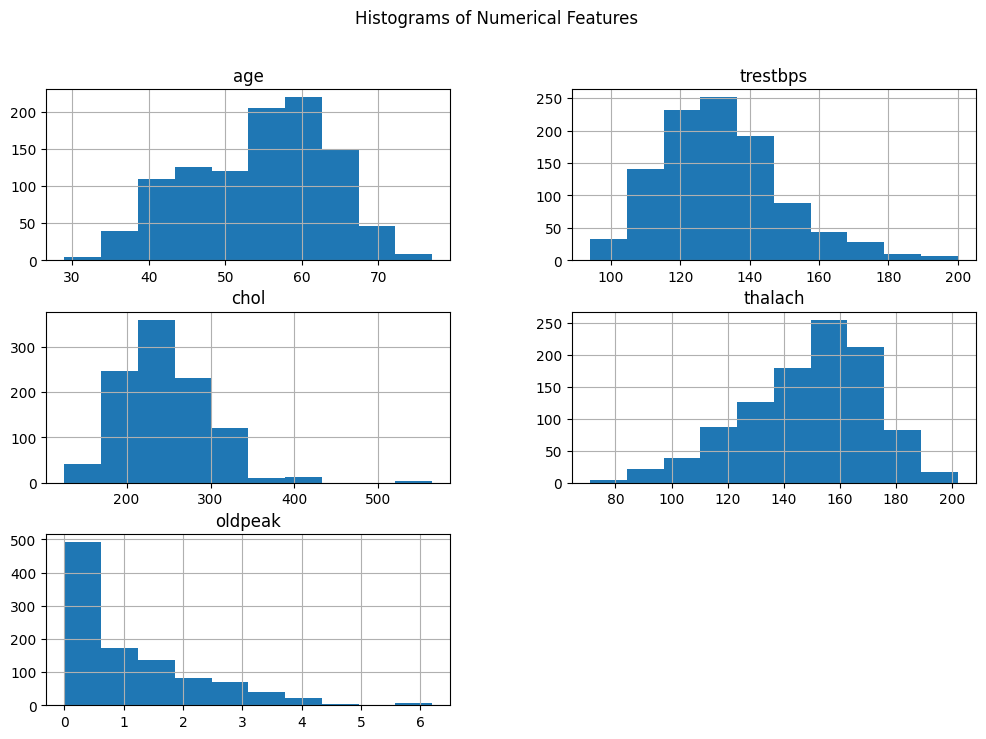

In [14]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[numerical_features].hist(figsize=(12, 8), bins=10)
plt.suptitle('Histograms of Numerical Features')
plt.show()

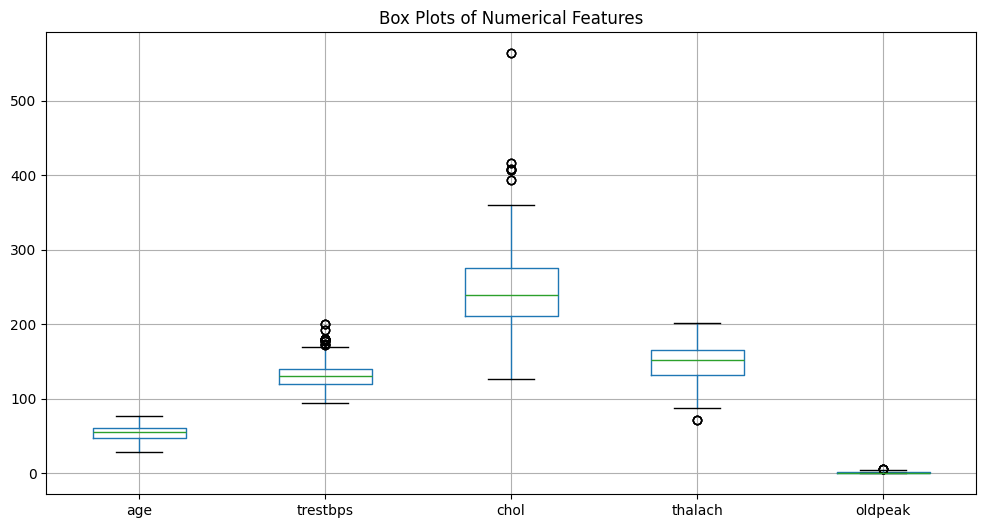

In [15]:
plt.figure(figsize=(12, 6))
heart_data.boxplot(column=numerical_features)
plt.title('Box Plots of Numerical Features')
plt.show()

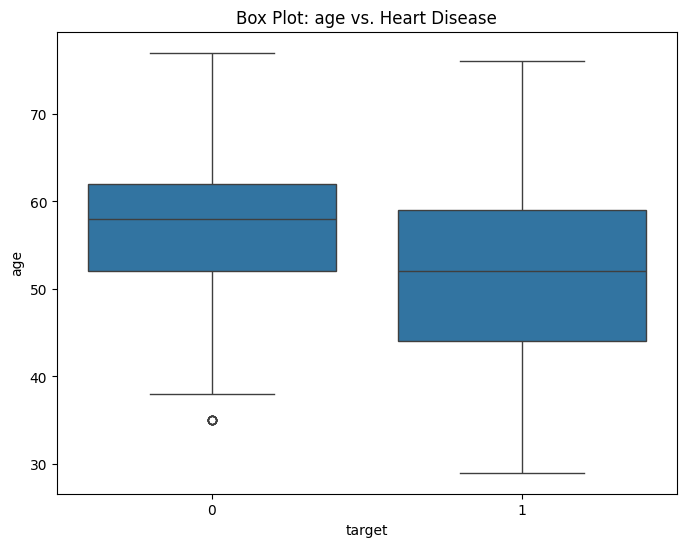

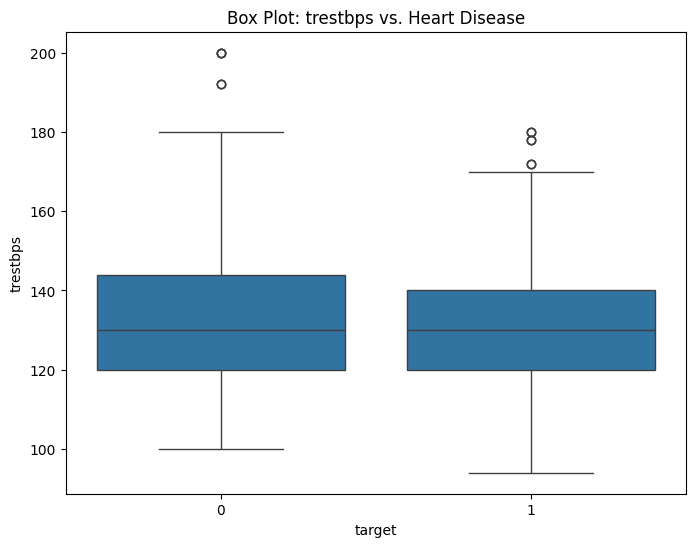

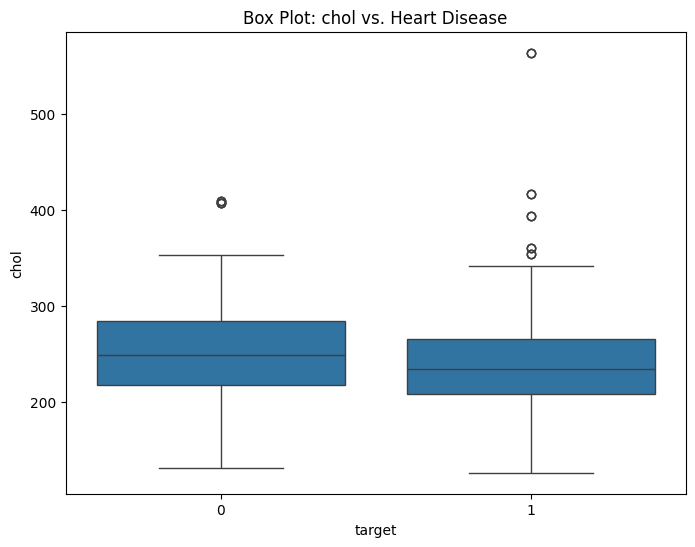

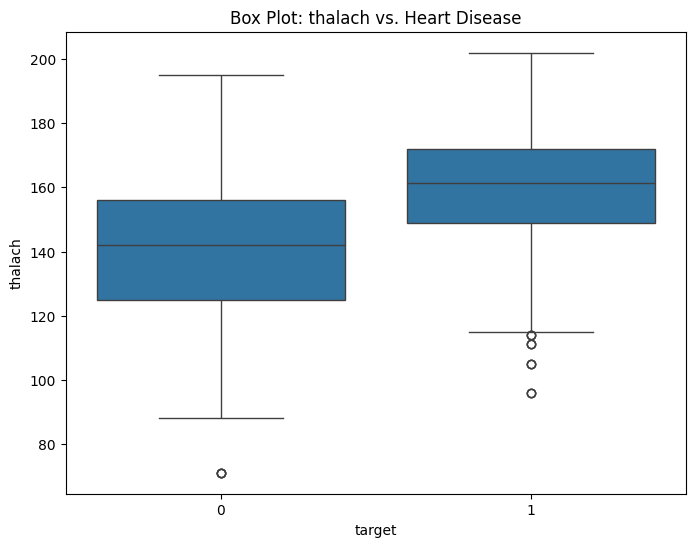

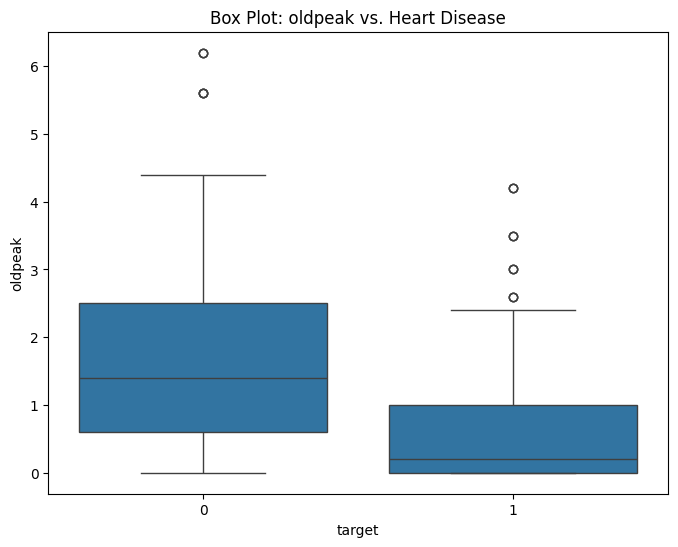

In [16]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=feature, data=heart_data)
    plt.title(f'Box Plot: {feature} vs. Heart Disease')
    plt.show()

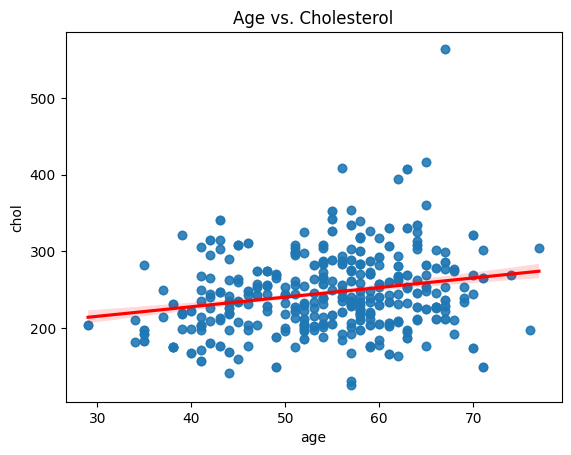

In [17]:
sns.regplot(x='age', y='chol', data=heart_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs. Cholesterol')
plt.show()

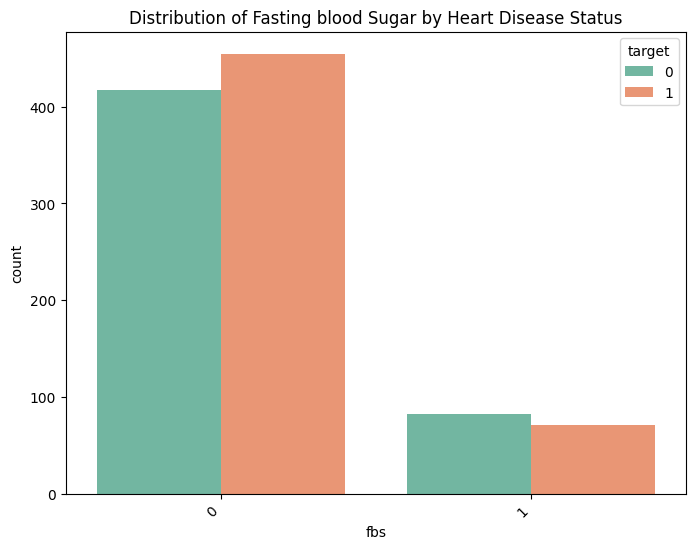

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='target', data=heart_data, palette='Set2') 
plt.title(f'Distribution of Fasting blood Sugar by Heart Disease Status')
plt.xticks(rotation=45, ha='right')  
plt.show()

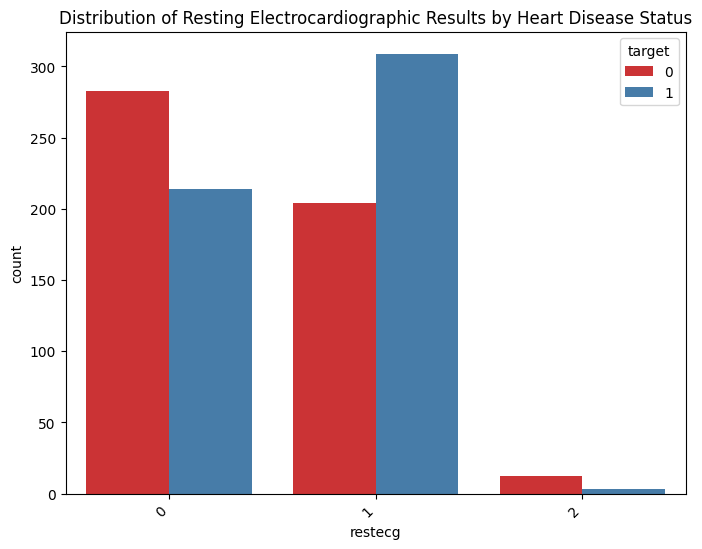

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='target', data=heart_data, palette='Set1')
plt.title(f'Distribution of Resting Electrocardiographic Results by Heart Disease Status')
plt.xticks(rotation=45, ha='right')  
plt.show()

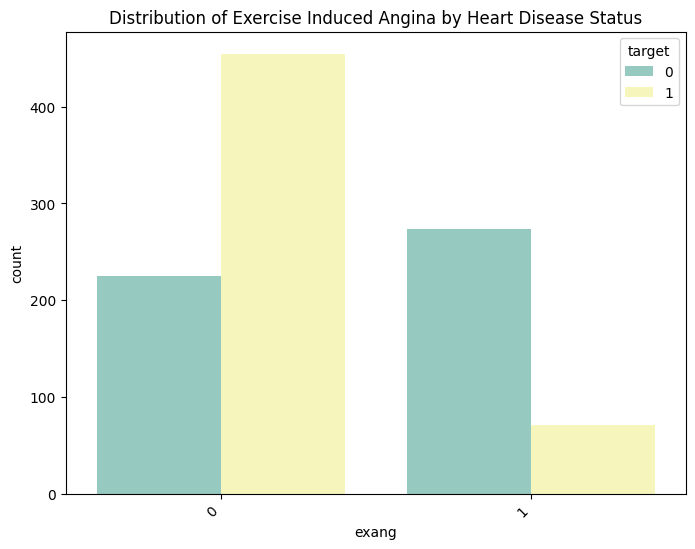

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=heart_data, palette='Set3') 
plt.title(f'Distribution of Exercise Induced Angina by Heart Disease Status')
plt.xticks(rotation=45, ha='right')  
plt.show()

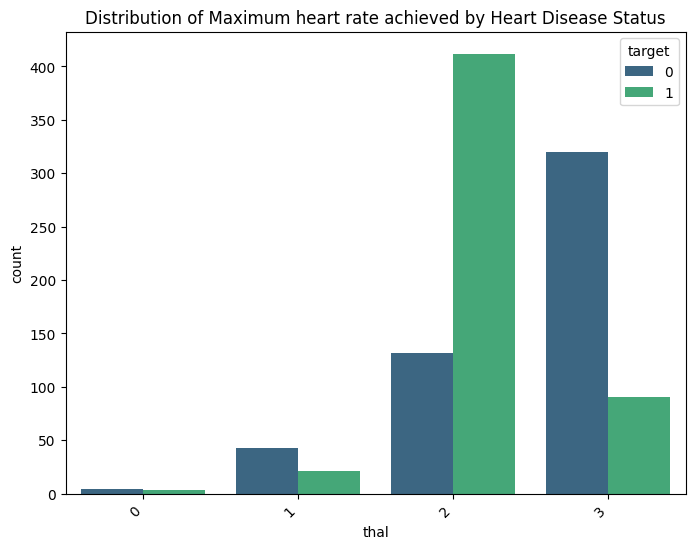

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='target', data=heart_data, palette='viridis')  
plt.title(f'Distribution of Maximum heart rate achieved by Heart Disease Status')
plt.xticks(rotation=45, ha='right')  
plt.show()

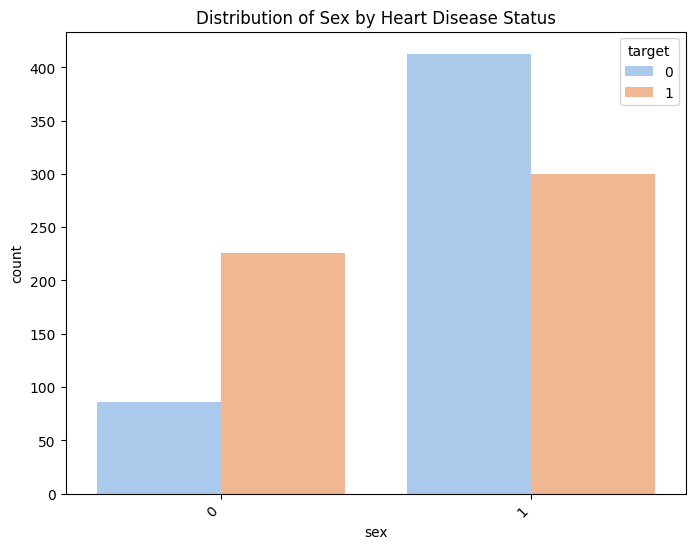

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=heart_data, palette='pastel') 
plt.title(f'Distribution of Sex by Heart Disease Status')
plt.xticks(rotation=45, ha='right')
plt.show()

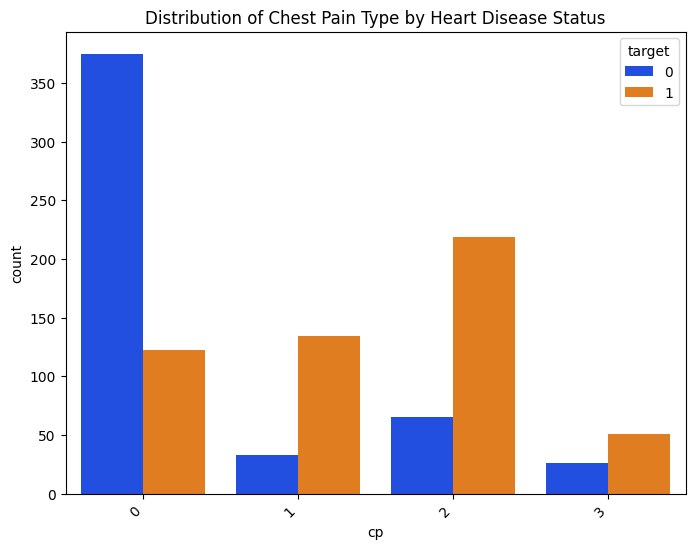

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=heart_data, palette='bright')  
plt.title(f'Distribution of Chest Pain Type by Heart Disease Status')
plt.xticks(rotation=45, ha='right') 
plt.show()

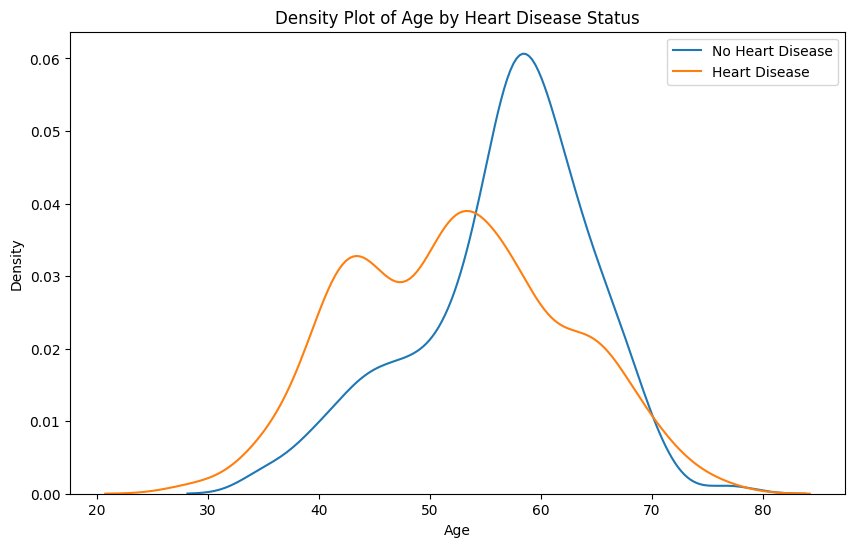

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(heart_data[heart_data['target'] == 0]['age'], label='No Heart Disease')
sns.kdeplot(heart_data[heart_data['target'] == 1]['age'], label='Heart Disease')
plt.title('Density Plot of Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

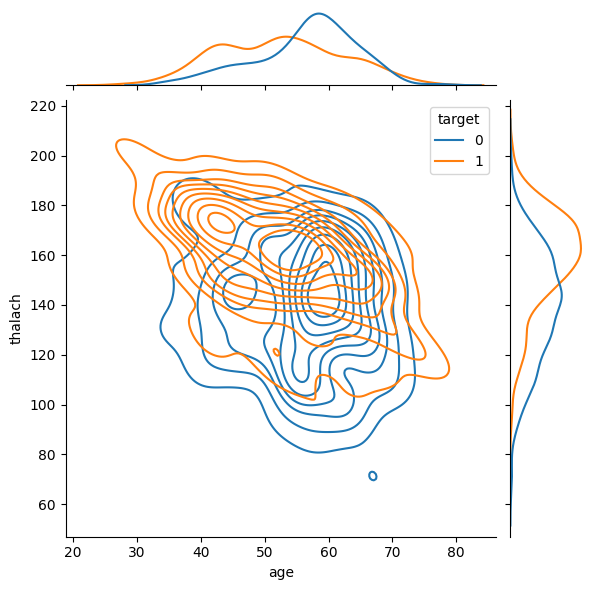

In [25]:
sns.jointplot(x='age', y='thalach', data=heart_data, kind='kde', hue='target') #Kernel density estimation
plt.show()

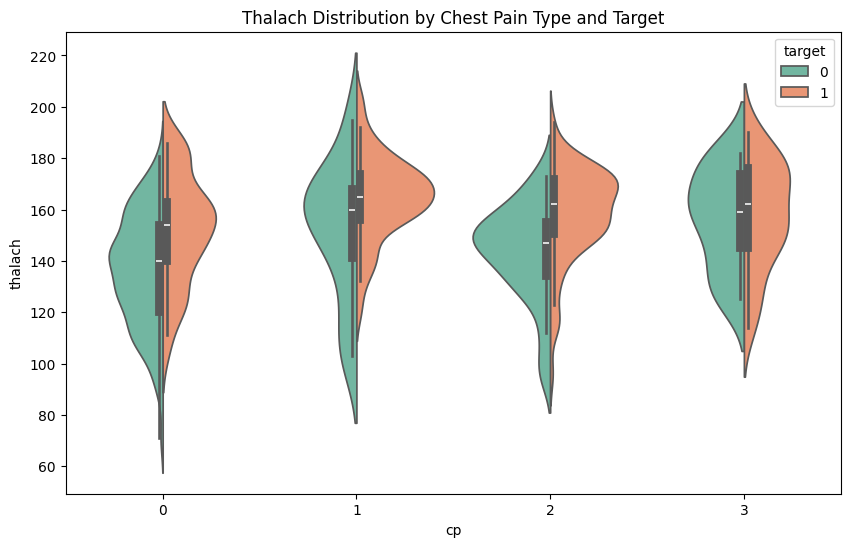

In [80]:
plt.figure(figsize=(10,6))
sns.violinplot(x='cp', y='thalach', hue='target', data=heart_data, split=True, palette='Set2')
plt.title('Thalach Distribution by Chest Pain Type and Target')
plt.show()

# Feature Engineering

In [26]:
heart_data['age_chol_interaction'] = heart_data['age'] * heart_data['chol']

In [27]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_chol_interaction
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,11024
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,10759
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,12180
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,12383
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,18228


here, we have approx equal distribution of data.

### Notation for Healthy and Defective Heart

- 1 Represents a Defective Heart
- 0 Represents a Healthy Heart


## Splitting the Features and Target

In [28]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_chol_interaction
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,11024
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,10759
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,12180
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,12383
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,18228


In [29]:
Y = heart_data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Number of outliers: 0
Outliers: 
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target, age_chol_interaction]
Index: []


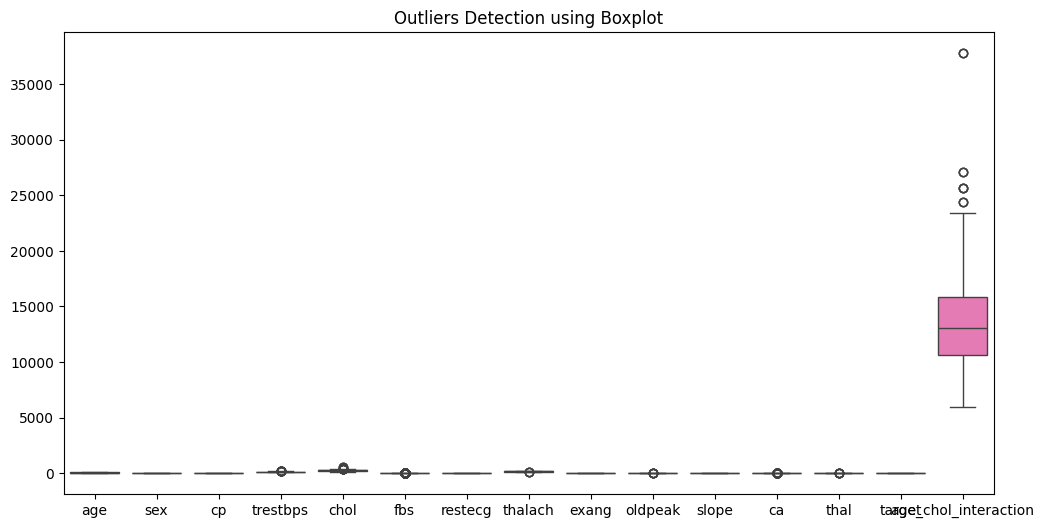

In [30]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Calculate Z-scores
z_scores = stats.zscore(X_standard)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Identifying outliers
outlier_data = heart_data[outliers]
print(f"Number of outliers: {len(outlier_data)}")
print(f"Outliers: \n{outlier_data}")

# Visualization of outliers (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_data)
plt.title('Outliers Detection using Boxplot')
plt.show()

#### Data Standardization

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X)
X_standard = scaler.transform(X)

In [33]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_standard)

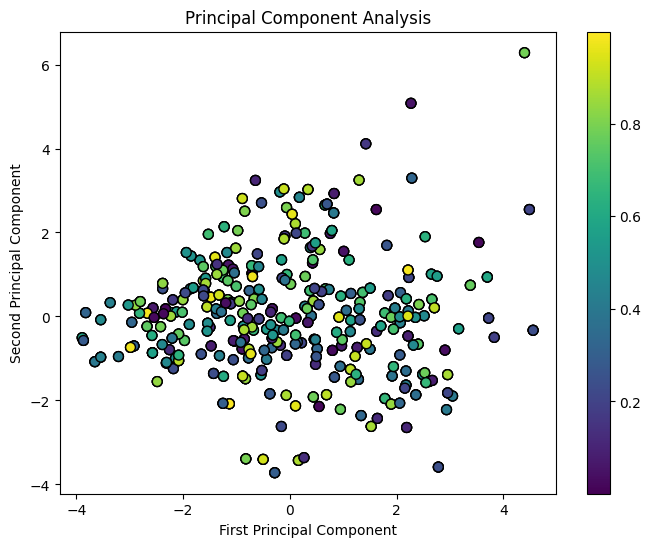

In [34]:
colors = np.random.rand(len(X_pca))  # Random color for each point

# Create a scatter plot with random colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='viridis', edgecolor='k', s=50)

# Add colorbar for reference
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis')
plt.show()

## Splitting the Data into Training data and Test data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 15 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 14) (871, 14) (154, 14)


In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_train, Y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_fold, Y_train_fold)
    
    y_pred = model.predict(X_test_fold)
    print(f"Fold Accuracy: {accuracy_score(Y_test_fold, y_pred):.4f}")

Fold Accuracy: 0.9714
Fold Accuracy: 0.9828
Fold Accuracy: 1.0000
Fold Accuracy: 0.9943
Fold Accuracy: 0.9598


In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [39]:
# Best Parameters and Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, y_pred):.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9862397372742201
Test Accuracy: 1.0000


## Model Training


A RandomForestClassifier is trained on the training data to compute feature importances. The rankings of features based on their importance are printed.

In [40]:
# Instantiate Random Forest Classifier for feature importance
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

Feature Importance using Random Forest

Feature ranking:
1. Feature 2: 0.1328
2. Feature 9: 0.1201
3. Feature 11: 0.1103
4. Feature 12: 0.1073
5. Feature 7: 0.1040
6. Feature 0: 0.0729
7. Feature 4: 0.0678
8. Feature 13: 0.0663
9. Feature 8: 0.0596
10. Feature 3: 0.0586
11. Feature 10: 0.0398
12. Feature 1: 0.0351
13. Feature 6: 0.0172
14. Feature 5: 0.0082


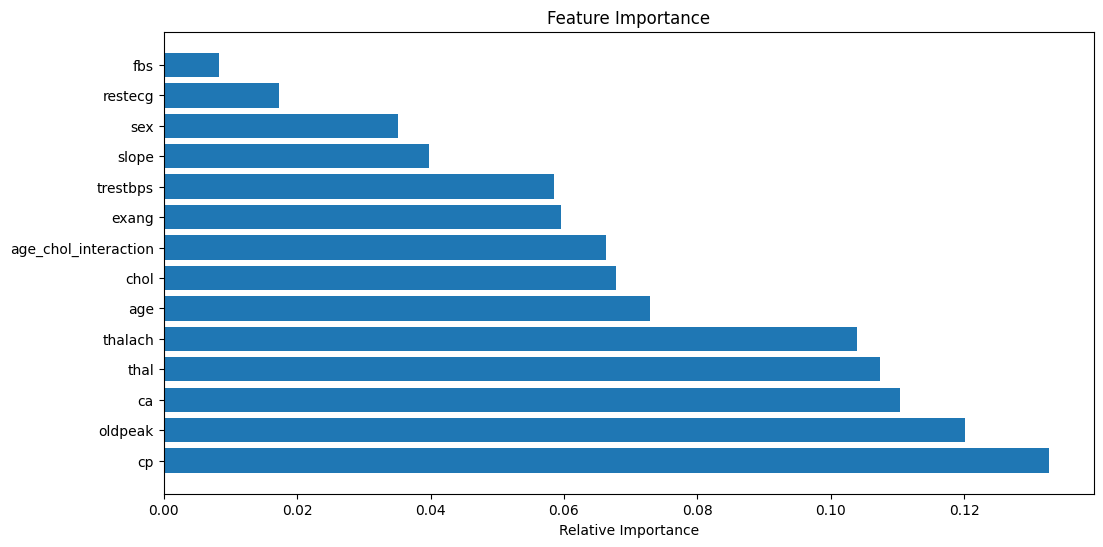

In [41]:
# Feature importance ranking
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(len(importances)):
    print(f"{i + 1}. Feature {indices[i]}: {importances[indices[i]]:.4f}")

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

SHAP

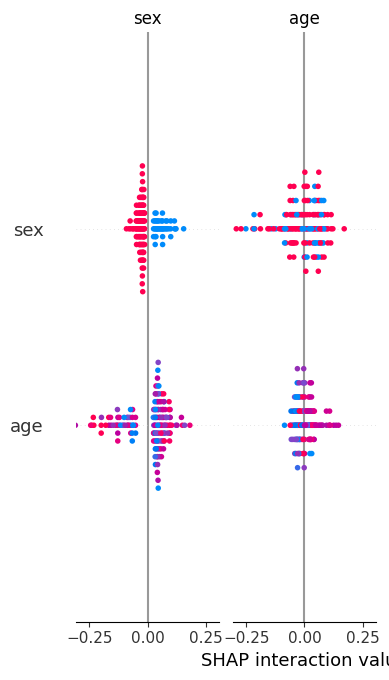

In [42]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

### 1. Logistic Regression



In [43]:
# instantiate the model
lr = LogisticRegression()

# training the LogisticRegression model with training data
lr.fit(X_train, Y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7857


### 2. Naive Bayes Classifier

In [45]:
# instantiate the model
gnb = GaussianNB()
# model = gnb

# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [46]:
y_pred = gnb.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7857


### 3. K-Nearest Neighbor (KNN)

In [47]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
y_pred = knn.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.6623


### 4. Decision Tree Classifier

In [49]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()


# fit the model
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dtc.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

# overfitted

Model accuracy score: 1.0000


### 5. Support Vector Machine (Linear)

In [51]:
# instantiate the model
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [52]:
y_pred = svm.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7857


# 6. KMeans

In [53]:
# Instantiate the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [54]:
y_pred = kmeans.predict(X_test)
sil_score = silhouette_score(X_test, y_pred)

print(f"Silhouette Score: {sil_score:0.4f}")

y_pred
print('\n')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Silhouette Score: 0.5241


Model accuracy score: 0.5130


In [55]:
y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.5130


# 7. Agglomerative Hierarchical Clustering

In [56]:
agg_clust = AgglomerativeClustering(n_clusters=3)
y_pred = agg_clust.fit_predict(X_train)
sil_score = silhouette_score(X_train, y_pred)

print(f"Silhouette Score: {sil_score:0.4f}")

Silhouette Score: 0.5096


# 8. Calinski-Harabasz Index

In [57]:
ch_score = calinski_harabasz_score(X_train, y_pred)

# Print the Calinski-Harabasz Score
print(f"Calinski-Harabasz Score: {ch_score:0.4f}")

Calinski-Harabasz Score: 1128.0790


## Multi-model training

In [58]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) # A higher gamma value means that each training example will have a greater influence on the decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') # liblinear is parameter specifies the solver to use,
# L1 penalty is a type of regularization that helps to prevent overfitting.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  # n_estimators : the number of trees in the forest,
# random_state : specifies the random seed that is used to initialize the random forest

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

kmeans = KMeans(n_clusters=2, random_state=42)
agg_clust = AgglomerativeClustering(n_clusters=2)

In [59]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb,
    'K-Means Clustering' : kmeans,
    'Agglomerative Clustering' : agg_clust
}

In [60]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
    # Check if the model is K-Means Clustering
    if isinstance(classification, KMeans):
        # Fit K-Means and predict clusters
        classification.fit(X_train)
        y_pred = classification.predict(X_test)

        # Calculate silhouette and Calinski-Harabasz scores
        sil_score = silhouette_score(X_test, y_pred)
        ch_score = calinski_harabasz_score(X_test, y_pred)

        print(f"Silhouette Score (K-Means): {sil_score:.4f}")
        print(f"Calinski-Harabasz Score: {ch_score:.4f}")

        return None, None, None  

    elif isinstance(classification, AgglomerativeClustering):
        y_pred = classification.fit_predict(X_train)
        sil_score = silhouette_score(X_train, y_pred)
        print(f"Silhouette Score (Agglomerative Clustering): {sil_score:.4f}")
        return None, None, None  

    # For supervised classifiers
    else:
        classification.fit(X_train, y_train)
        y_pred = classification.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        matrix = confusion_matrix(y_test, y_pred)

        return accuracy, precision, matrix

In [61]:
accuracy_scores = []
precision_scores = []

In [62]:
for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, X_train, Y_train, X_test, Y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusion-Matrix : ", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

Model name :  Support Vector Classifier
Accuracy :  0.512987012987013
Precision :  0.512987012987013
Confusion-Matrix :  [[ 0 75]
 [ 0 79]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.7077922077922078
Precision :  0.765625
Confusion-Matrix :  [[60 15]
 [30 49]] 

Model name :  Multinomial NB
Accuracy :  0.6753246753246753
Precision :  0.7164179104477612
Confusion-Matrix :  [[56 19]
 [31 48]] 

Model name :  Decision Tree Classifier
Accuracy :  0.9025974025974026
Precision :  0.9210526315789473
Confusion-Matrix :  [[69  6]
 [ 9 70]] 

Model name :  Logistic Regression
Accuracy :  0.8506493506493507
Precision :  0.85
Confusion-Matrix :  [[63 12]
 [11 68]] 



Model name :  Random Forest Classifier
Accuracy :  1.0
Precision :  1.0
Confusion-Matrix :  [[75  0]
 [ 0 79]] 

Model name :  AdaBoost Classifier
Accuracy :  0.9025974025974026
Precision :  0.9324324324324325
Confusion-Matrix :  [[70  5]
 [10 69]] 



c:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model name :  Bagging Classifier
Accuracy :  1.0
Precision :  1.0
Confusion-Matrix :  [[75  0]
 [ 0 79]] 

Model name :  Extra Trees Classifier
Accuracy :  1.0
Precision :  1.0
Confusion-Matrix :  [[75  0]
 [ 0 79]] 

Model name :  Gradient Boosting Classifier
Accuracy :  0.9285714285714286
Precision :  0.9358974358974359
Confusion-Matrix :  [[70  5]
 [ 6 73]] 

Model name :  XGB Classifier
Accuracy :  1.0
Precision :  1.0
Confusion-Matrix :  [[75  0]
 [ 0 79]] 

Silhouette Score (K-Means): 0.5671
Calinski-Harabasz Score: 281.2535
Model name :  K-Means Clustering
Accuracy :  None
Precision :  None
Confusion-Matrix :  None 

Silhouette Score (Agglomerative Clustering): 0.5583
Model name :  Agglomerative Clustering
Accuracy :  None
Precision :  None
Confusion-Matrix :  None 



In [63]:
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [64]:
result_dataframe

,Algorithm,Accuracy,Precision
5,Random Forest Classifier,1.000000,1.000000
7,Bagging Classifier,1.000000,1.000000
8,Extra Trees Classifier,1.000000,1.000000
10,XGB Classifier,1.000000,1.000000
9,Gradient Boosting Classifier,0.928571,0.935897
6,AdaBoost Classifier,0.902597,0.932432
3,Decision Tree Classifier,0.902597,0.921053
4,Logistic Regression,0.850649,0.850000
1,K-Neighbors Classifier,0.707792,0.765625
2,Multinomial NB,0.675325,0.716418


In [65]:
#Feature Importance using Random Forest
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for i in range(len(importances)):
    print(f"{i + 1}. Feature {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

Feature ranking:
1. Feature cp: 0.1330
2. Feature ca: 0.1222
3. Feature thal: 0.1083
4. Feature thalach: 0.1065
5. Feature oldpeak: 0.0934
6. Feature age_chol_interaction: 0.0767
7. Feature age: 0.0679
8. Feature exang: 0.0671
9. Feature chol: 0.0646
10. Feature trestbps: 0.0625
11. Feature slope: 0.0392
12. Feature sex: 0.0354
13. Feature restecg: 0.0137
14. Feature fbs: 0.0095


## Model Improvement

In [66]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 42)
bc = BaggingClassifier(n_estimators = 50, random_state = 42)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 42)
xgb = XGBClassifier(n_estimators = 50, random_state= 42)


In [67]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('bc', bc), ('et', etc), ('xgb', xgb)],voting='soft')

In [68]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=42)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [69]:
y_pred = voting.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

# voting model is most accurate and precise

1.0
[[75  0]
 [ 0 79]]
1.0


## Model Evaluation

- Accuracy score
  - 1. For training data
  - 2. For testing data

  accuracy score for both should be closer to 1

- Other Metrices:
  - 1. Accuracy
  - 2. Precision
  - 3. Recall
  - 4. F1 Score

- Confusion Matrix
  

In [70]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  1.0


In [71]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  1.0


In [72]:
# Accuracy, F1, Recall, Precision

Y_pred = voting.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 1.0
Precision  : 1.0
Recall     : 1.0
F1-score   : 1.0


In [73]:
# check results
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



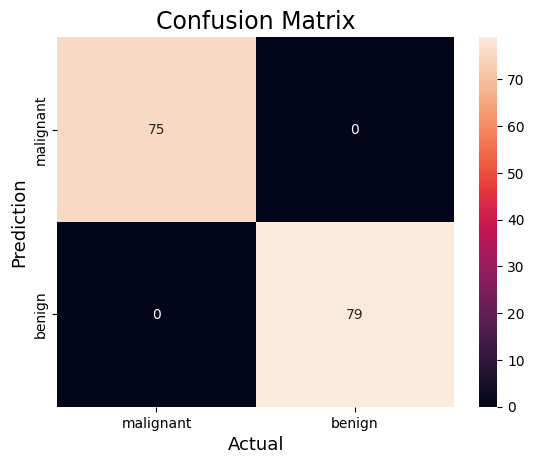

In [74]:
cm = confusion_matrix(Y_test,Y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Building Prediction system

#### Steps :

  - take input data
  - Process the data, change into array
  - reshape data as single element in array
  - predict output using predict function
  - output the value

In [75]:
# input feature values
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2,0)

# changing data to numpy array
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)

In [76]:
# predicting the result and printing it

prediction = voting.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart 💛💛💛💛")

else:
    print("Patient has a heart Disease 💔💔💔💔")

[1]
Patient has a heart Disease 💔💔💔💔


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


### Notations
  - [0] : means patient has a healthy heart 💛💛💛💛
  - [1] : means patient has a unhealthy heart 💔💔💔💔
  

## Saving the model

In [77]:
import pickle
filename = "trained_model.pkl"
pickle.dump(voting, open(filename, 'wb'))

In [78]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl",'rb'))

In [79]:
# save the model to disk
filename = 'heart_model.sav'
joblib.dump(voting, filename)

['heart_model.sav']